# Ford Gobike Tripdata Analysis
## by (Mostafa Abdelaleem)

## Investigation Overview

**In this presentation we will try to answer the following questions using our dataset about individual rides made in a bike-sharing system covering the greater San Francisco Bay area:**    
* what is the average time for a trip?
* when is the rush hours?
* what are the most popular stations ?
* what is the user classifications by age, gender, and user type (customer or subscriber)?


## Dataset Overview

**The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.**    
**Datasets columns:**    
{ duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender:, bike_share_for_all_trip }

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('fordgobike-tripdata.csv')
df.head()
# Check and clean missing data 

def cast_date(x):
    '''this function switchs data from strings to datetime type'''
    return pd.to_datetime(x)
def sec_to_min(x):
    '''this function switchs data from Seconds into minutes'''
    return x/60
def get_age(born,current):
    return current - born

    
print(f'Shape before droping nulls: {df.shape}' )
print(f'Is there any records with missing data? {df.isna().any().any()}' )
# drop nulls
df.dropna(inplace=True)
print(f'Is there any records with missing data still? {df.isna().any().any()}')
print(f'Shape After droping nulls: {df.shape}')
print(f'Is there any duplicated records? {df.duplicated().any()}','\n')

# fix data types
df['start_time']= cast_date(df['start_time'])
df['end_time']= cast_date(df['end_time'])
df['start_station_id']=df['start_station_id'].astype(int)
df['end_station_id']=df['end_station_id'].astype(int)

# create new column for duration in minutes and user age
current_year=df['end_time'].max().year

try:
    df.insert(1,'duration_min',sec_to_min(df['duration_sec']) )
    df.insert(14,'user_age',get_age(df['member_birth_year'],current_year).astype(int) )
    
except:
    pass



Shape before droping nulls: (183412, 16)
Is there any records with missing data? True
Is there any records with missing data still? False
Shape After droping nulls: (174952, 16)
Is there any duplicated records? False 



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ride duration distribution

**Let's discover the distribution of the ride duration using the records we have and by plotting the histogram of the ride duration in minutes**

In [3]:
## histogram of a variable
def hist_var(var,bin_wid,align='mid'):
    min_1=var.min()
    max_1=var.max()
    bins=np.arange(min_1, max_1+bin_wid ,bin_wid)
    if align:
        plt.hist(var,bins=bins,align=align)
    else:
        plt.hist(var,bins=bins)
    return bins

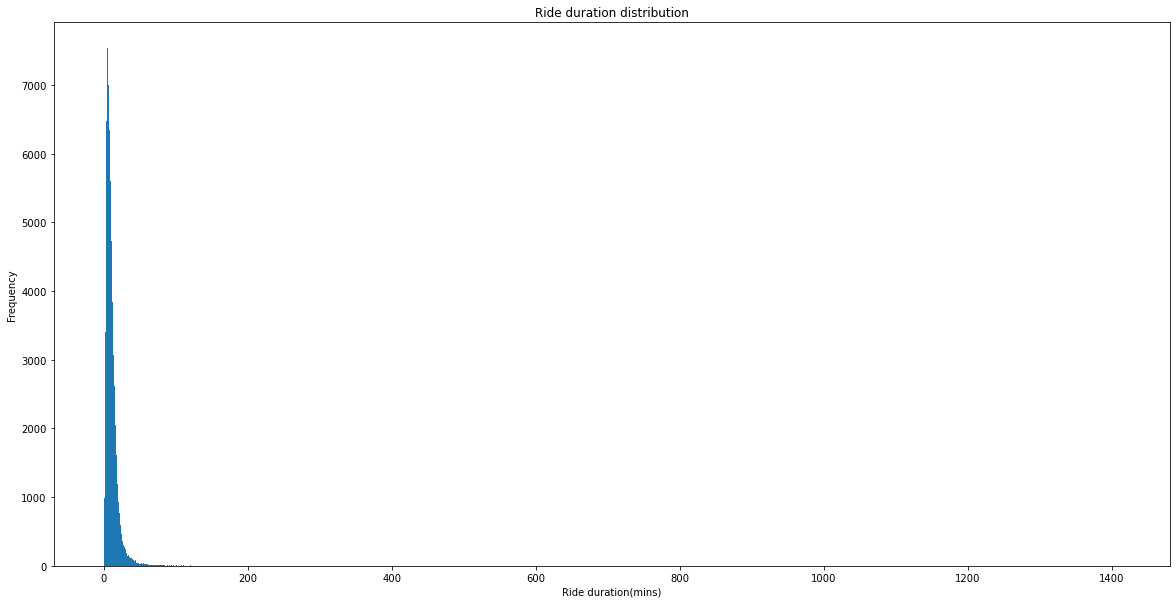

90% of trip duartions falls under 19.35 minutes


In [4]:
# set default plot size
plt.rcParams['figure.figsize'] = (20, 10)
## histogram of the renting minutes
hist_var(df['duration_min'],0.5)
plt.title('Ride duration distribution')
plt.xlabel('Ride duration(mins)')
plt.ylabel('Frequency');
plt.show()
print(f'90% of trip duartions falls under {df.duration_min.quantile(0.90)} minutes')

**since 90% of our data falls below 20 min let's replot the distribution zooming in on values below 20 min**

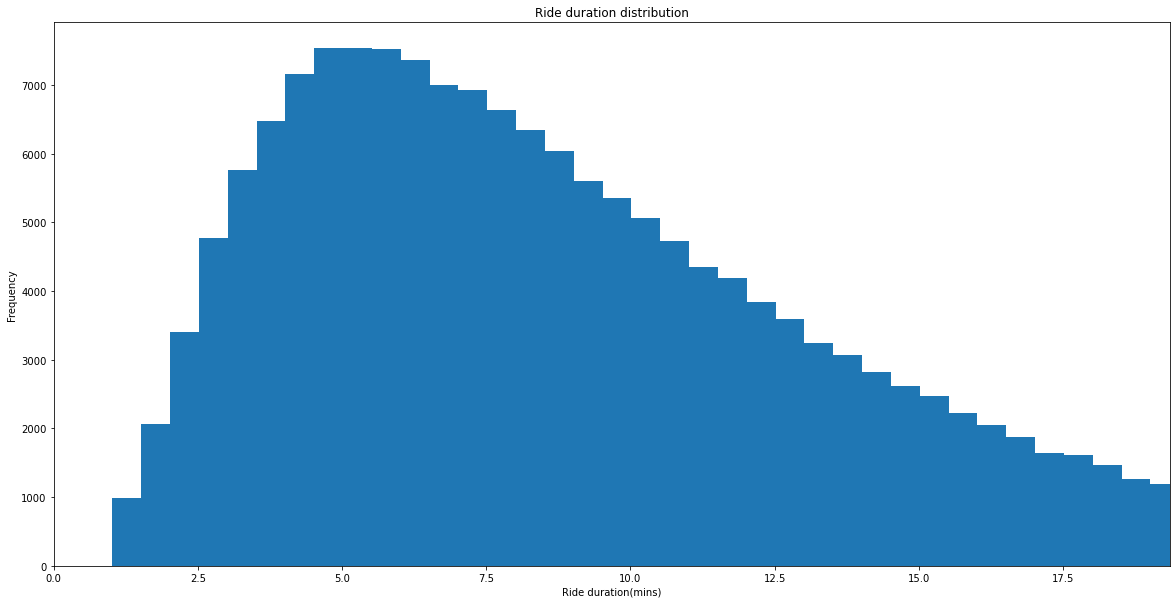

In [5]:

# we can see that 90% of the data have duration less than 20 mins

hist_var(df['duration_min'],0.5)
plt.xlim(0,df['duration_min'].quantile(0.90));
plt.title('Ride duration distribution')
plt.xlabel('Ride duration(mins)')
plt.ylabel('Frequency');

### The distribution of reting duration in minutes appears to be right skewed and we have a some out liers in the data that might be some error or lost bikes or a very long rent. :D

## Rush hours

**Let's try to find out which are the busiest hours** 

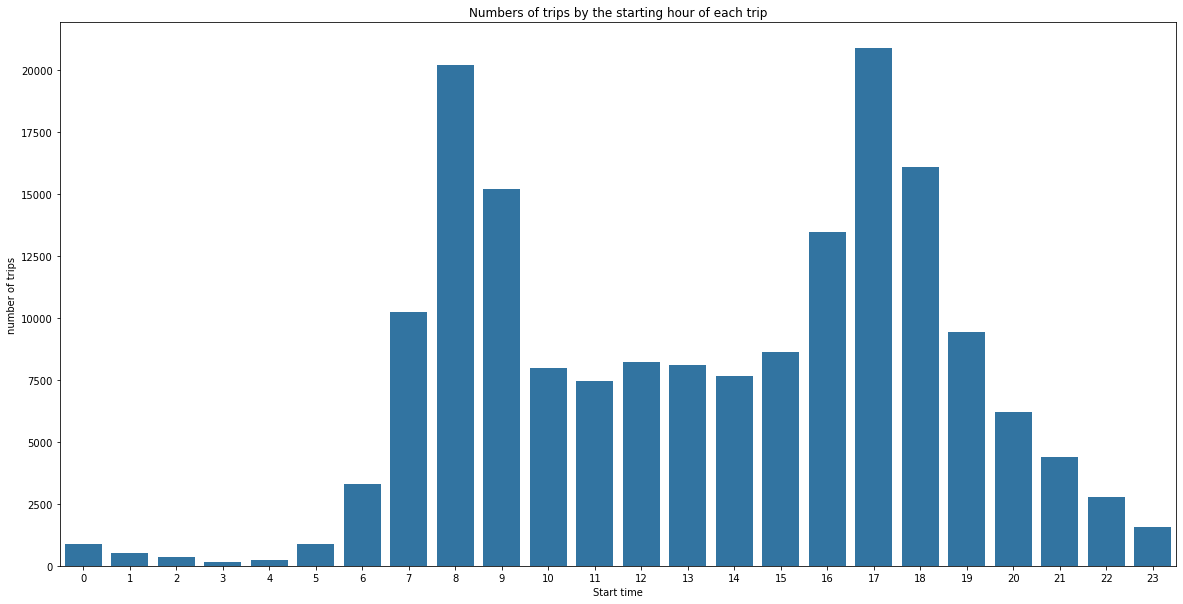

In [6]:
co=sns.color_palette()[0]
sns.countplot(data=df, x=df['start_time'].apply(lambda x:x.hour),  color=co);
plt.title('Numbers of trips by the starting hour of each trip')
plt.xlabel('Start time')
plt.ylabel("number of trips");

### The distributions is bimodal with two peaks at 8 and 17, which is very predictable since those are the most common starting and ending times of working hours. It also show a drastic drops in renting from 0 to 6 which is also predictable

## Most and Least popular starting stations

**What are the most popular starting stations**


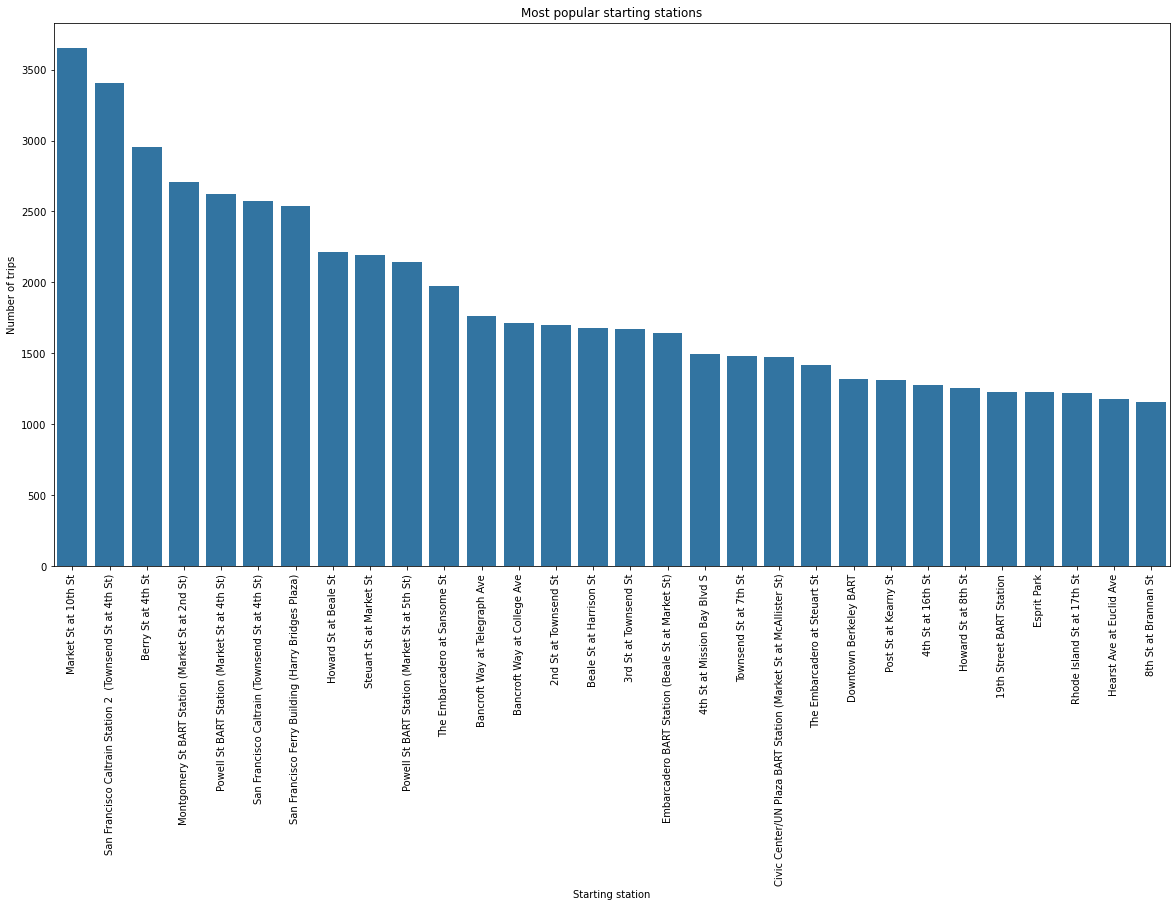

In [7]:
# number of unique stations
# print(f"number of unique stations: {len(df['start_station_name'].unique())}");
# we can see there is a lot of staions to plot so let plot the most and least popular
least_pop_stations=df.groupby('start_station_name').size().sort_values()[:30]
most_pop_stations=df.groupby('start_station_name').size().sort_values()[-30:]
df_pop=df[df['start_station_name'].isin(most_pop_stations.index)]
df_unpop=df[df['start_station_name'].isin(least_pop_stations.index)]
co=sns.color_palette()[0]
sns.countplot(data=df_pop,x='start_station_name',order=most_pop_stations.index[::-1], color=co);
plt.xticks(rotation=90)
plt.title("Most popular starting stations")
plt.xlabel('Starting station')
plt.ylabel('Number of trips')
plt.show()



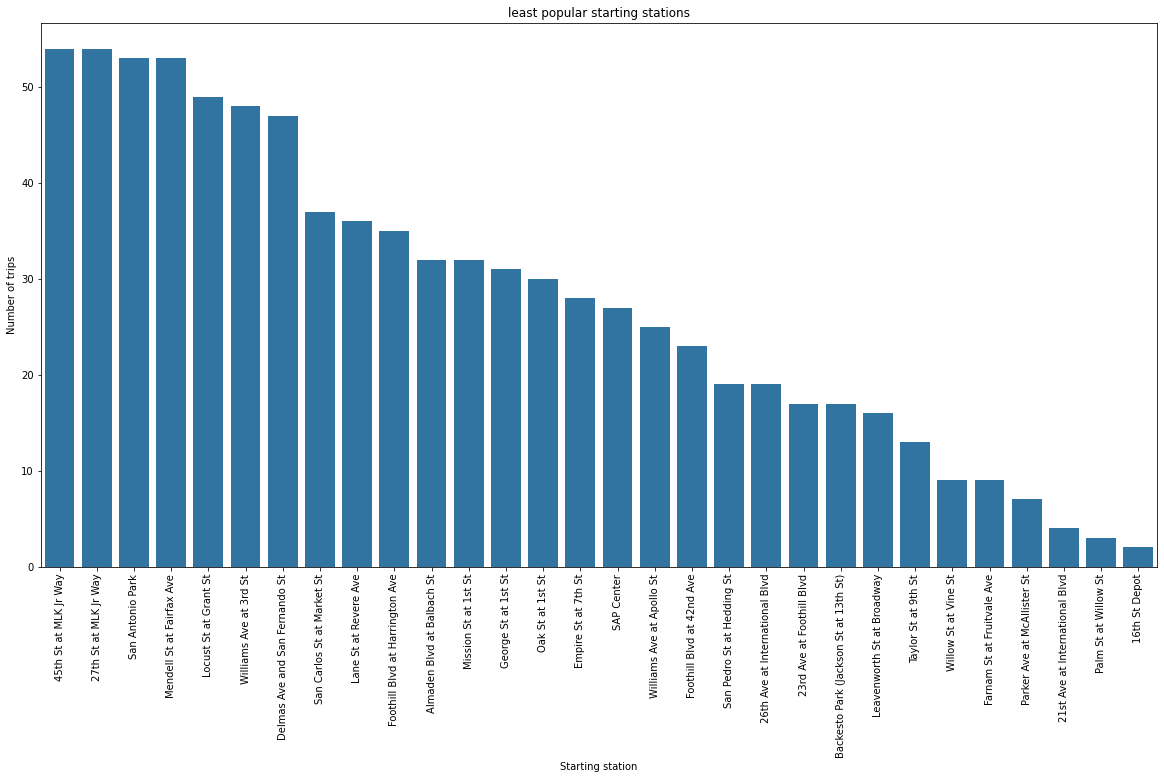

In [8]:
sns.countplot(data=df_unpop,x='start_station_name',order=least_pop_stations.index[::-1],  color=co);
plt.xticks(rotation=90);
plt.title("least popular starting stations")
plt.xlabel('Starting station')
plt.ylabel('Number of trips');

### The most popular start station is 'market St at 10th St' and the least popular is '16th St Depot'

## what is the user classifications by age, gender, and user type (customer or subscriber)?

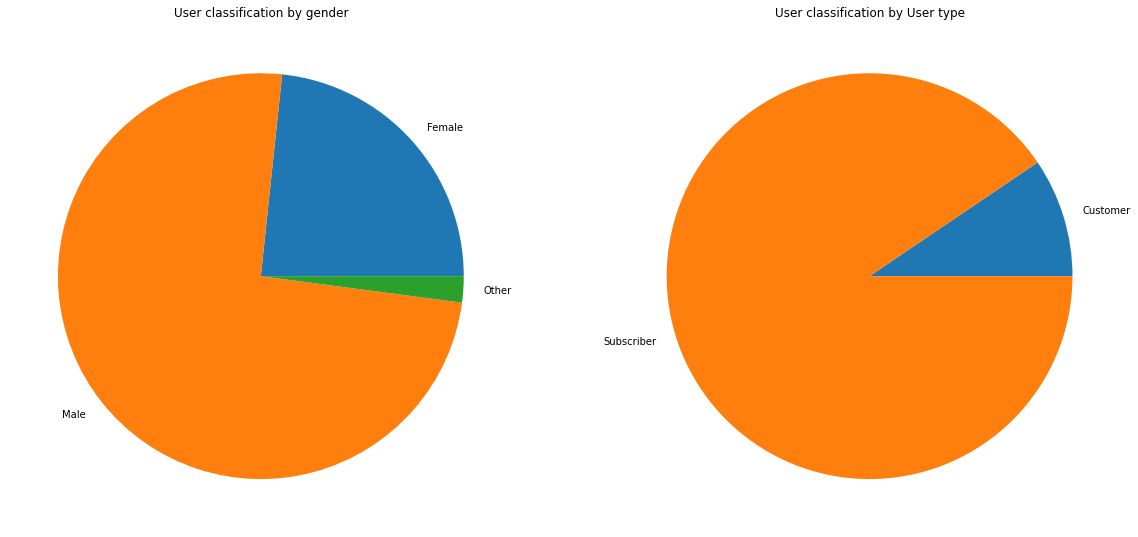

In [9]:
plt.subplot(1,2,1)
x=df.groupby('member_gender').size()
plt.pie(x,labels=x.index);
plt.title('User classification by gender')
plt.subplot(1,2,2)
x=df.groupby('user_type').size()
plt.pie(x,labels=x.index);
plt.title('User classification by User type');

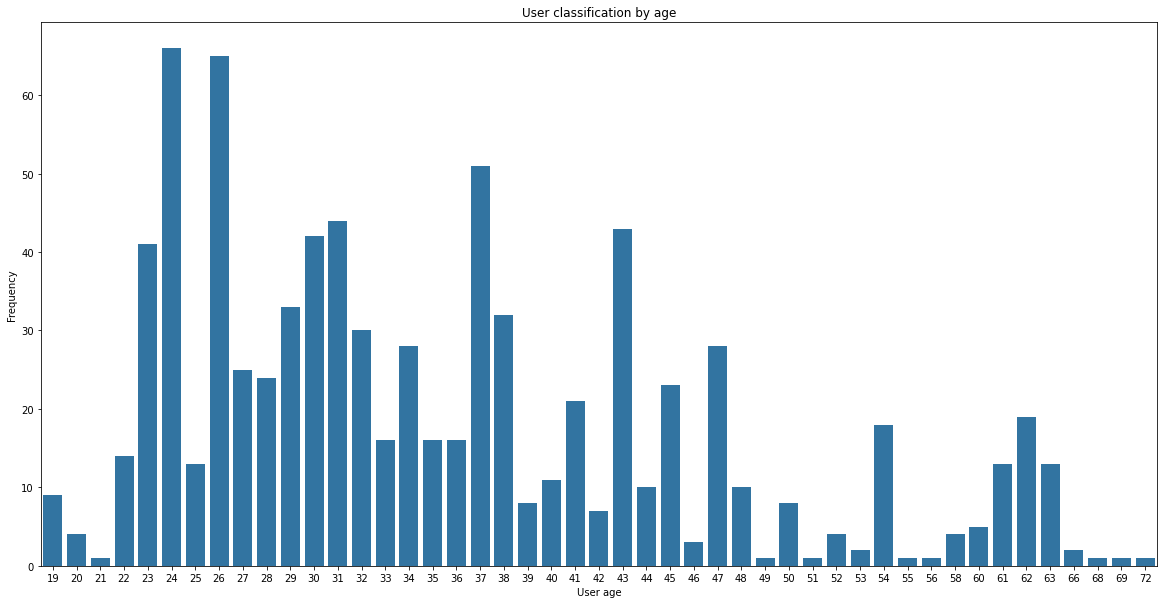

In [10]:
sns.countplot(data=df_unpop,x='user_age',  color=co);
plt.title('User classification by age')
plt.xlabel('User age')
plt.ylabel('Frequency');

### As we can see most of the users are males and are subscribers, Also most of the users are in the 20's and 30's with peaks in ages of 26, 24, 35, 62, and 23.

## User age vs start trip time

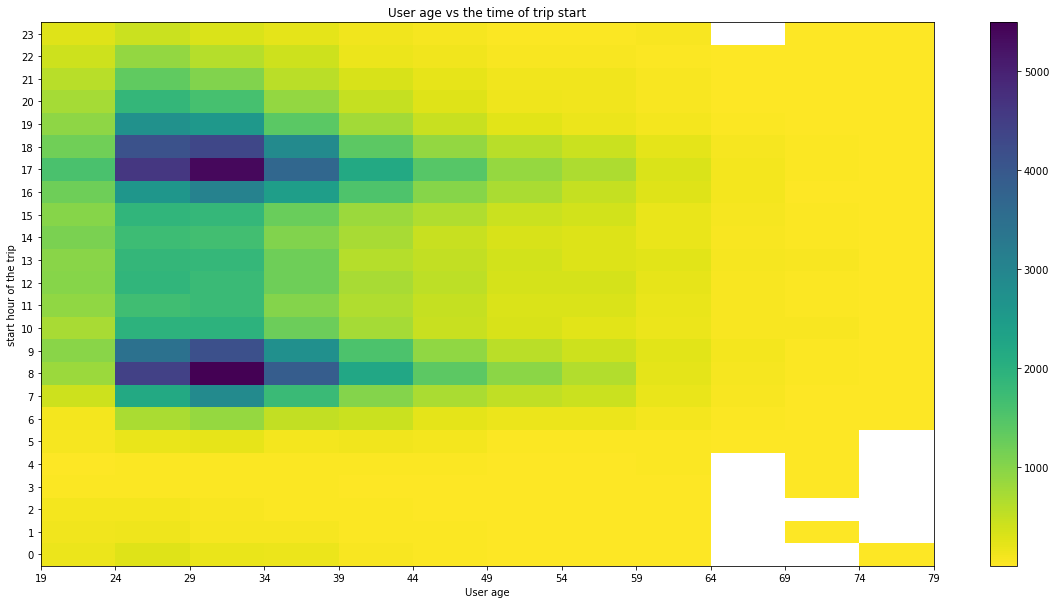

In [11]:
ybins=np.arange(0,25,1)
xbins=np.arange(19,80,5)
plt.hist2d(data=df,x=df['user_age'],y=df['start_time'].apply(lambda x:x.hour),
          cmin=0.5,cmap='viridis_r',bins=(xbins,ybins));
plt.xticks(xbins,xbins);
plt.yticks(ybins[:-1]+0.5,ybins[:-1]);
plt.colorbar();
plt.title('User age vs the time of trip start')
plt.xlabel('User age')
plt.ylabel('start hour of the trip');

### This plot of age aginst starting hour of renting shows that most users are in the 20's and 30's and the most common hours for them are between 6->9 in the morning and 16->19 in the evening which make sense as those are the most common starting and ending times of working hours

## User Type vs Ride duration
**Find out if user type affect the duration of the trip**

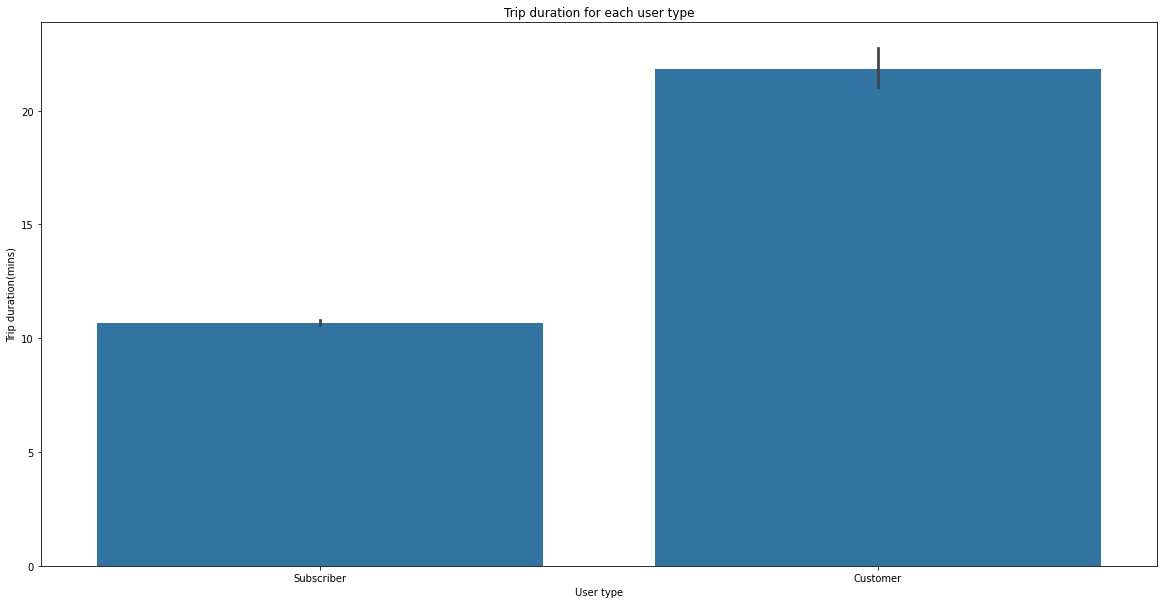

In [12]:
sns.barplot(data=df,x='user_type',y='duration_min',color=co,order=['Subscriber','Customer']);
plt.title('Trip duration for each user type')
plt.xlabel('User type')
plt.ylabel('Trip duration(mins)');
plt.show();


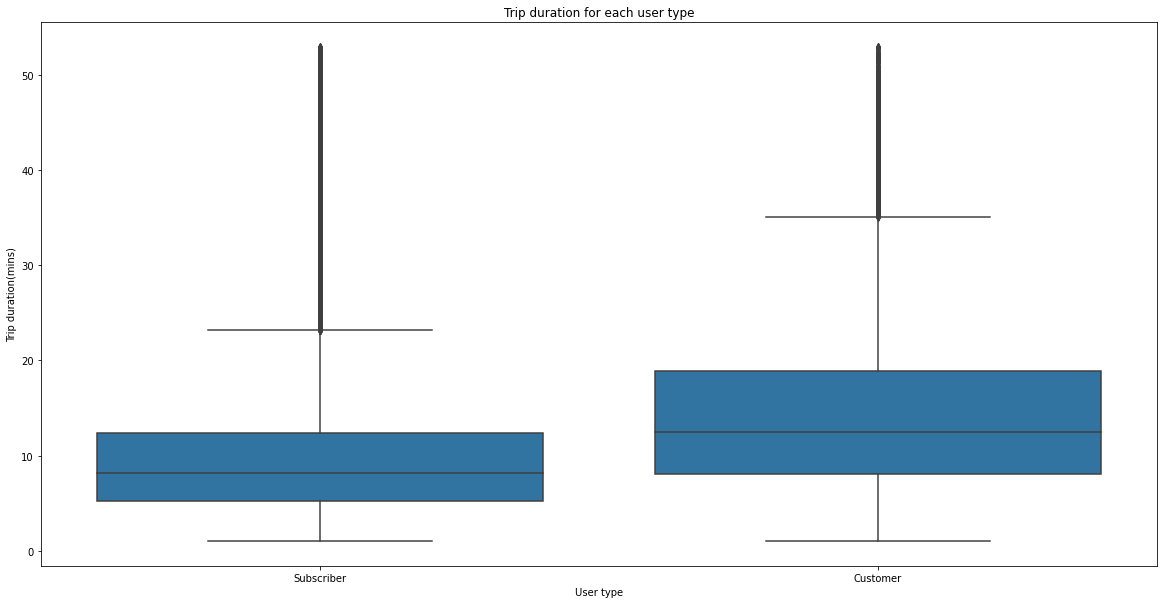

In [13]:
df1=df[df['duration_min'] <= df['duration_min'].quantile(0.99)]### User age vs start renting time
sns.boxplot(data=df1,x='user_type',y='duration_min',color=co);
plt.title('Trip duration for each user type')
plt.xlabel('User type')
plt.ylabel('Trip duration(mins)');

### The plots shows that on average subscribers has shorter rides than customers which might mean that subscriber use the bike as their main transportation for work with shorter rider while customers might rent bikes for fun which takes longer than a regular work commute ride 

## Trip duration vs user type by Menmber gender

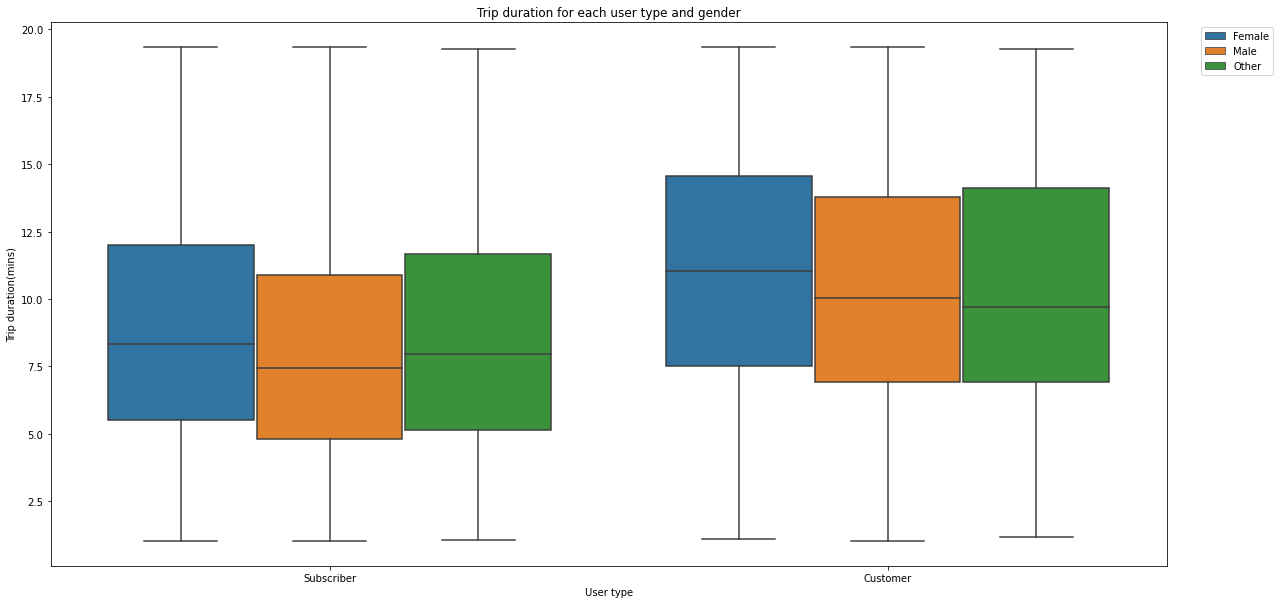

In [14]:
df1=df[df['duration_min'] <= df['duration_min'].quantile(0.9)]
sns.boxplot(data=df1,x='user_type',y='duration_min',hue='member_gender')
plt.legend( bbox_to_anchor=(1.1, 1));
plt.title('Trip duration for each user type and gender')
plt.xlabel('User type')
plt.ylabel('Trip duration(mins)');

### Again another proof that customers tend to have longer trips than subscribers and females also tend to have the longer trips as well

# Summary

**Using visulaztions to find answers about the data, the following insights was found:**    
* The Trip duration follow a right skewed distribution and 90% of durations fall under 19.35 minutes.
* The busiest hours are 8 and 17 and the trips from 0 to 5 o'clock are much lower than other hours.    
* The most popular start station is 'market St at 10th St' and the least popular is '16th St Depot'.    
* Most of the users are males and are subscribers, Also most of the users are in the 20's and 30's with peaks in ages of 26, 24, 35, 62, and 23.   
* On average subscribers has shorter rides than customer which might mean that subscriber use the bike as their main transportation for work with shorter rider while customers might rent bikes for fun which takes longer than a regular work commute ride.    